In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.transforms import offset_copy
import numpy as np
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as mticker

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
class Location:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon


In [4]:
oli = Location('OLI', 70.49525, -149.88688)
ascos = Location('ASCOS', 87.19, -9.67)
smt = Location("SMT", 72.6, -38.5)

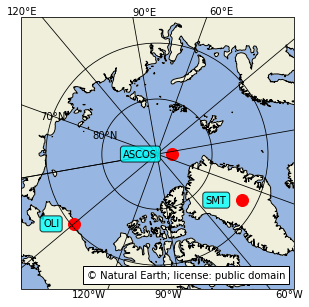

In [7]:
fig = plt.figure(figsize=(5,5))

projection = ccrs.NorthPolarStereo(central_longitude=-100)

ax = plt.subplot(projection=projection)

ax.plot(oli.lon, oli.lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())
ax.plot(ascos.lon, ascos.lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())
ax.plot(smt.lon, smt.lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())

cartopy_transform = ccrs.PlateCarree()._as_mpl_transform(ax)
text_transform = offset_copy(cartopy_transform, units='dots', x=-15)

text_kwargs = dict(verticalalignment='center', horizontalalignment='right', transform=text_transform,
        bbox={
            'facecolor':'aqua',
            'alpha' : 0.8,
            'boxstyle' : 'round'
        })

ax.text(oli.lon, oli.lat, "OLI", **text_kwargs)
ax.text(ascos.lon, ascos.lat, "ASCOS", **text_kwargs)
ax.text(smt.lon, smt.lat, "SMT", **text_kwargs)

ax.set_extent([0, 360, 65, 90], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

xticks = np.arange(-180, 181, 30)
yticks = np.arange(70, 91, 10)

gl = ax.gridlines(crs=ccrs.PlateCarree(), color='k', draw_labels=True, dms=True, x_inline=False, y_inline=True)
gl.ylocator = mticker.FixedLocator(yticks)
gl.xlocator = mticker.FixedLocator(xticks)
gl.xlabel_style = {'rotation':0}

# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

text = AnchoredText('© Natural Earth; license: public domain',
                    loc=4, prop={'size': 10}, frameon=True)
ax.add_artist(text)

plt.savefig('fig01.pdf', facecolor='w')

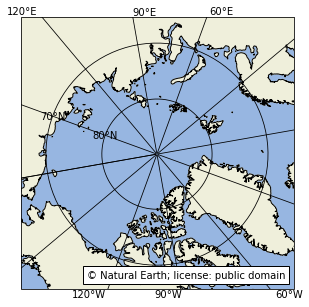

In [6]:
# fig = plt.figure(figsize=(5,5))

# projection = ccrs.NorthPolarStereo(central_longitude=-100)

# ax = plt.subplot(projection=projection)

# ax.set_extent([0, 360, 65, 90], crs=ccrs.PlateCarree())

# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND)

# xticks = np.arange(-180, 181, 30)
# yticks = np.arange(70, 91, 10)

# gl = ax.gridlines(crs=ccrs.PlateCarree(), color='k', draw_labels=True, dms=True, x_inline=False, y_inline=True)
# gl.ylocator = mticker.FixedLocator(yticks)
# gl.xlocator = mticker.FixedLocator(xticks)
# gl.xlabel_style = {'rotation':0}
# text = AnchoredText('© Natural Earth; license: public domain',
#                     loc=4, prop={'size': 10}, frameon=True)
# ax.add_artist(text)

# plt.savefig('fig01.pdf', facecolor='w')